# Imports

In [1]:
from PME import PME1DBB, PME2DBB
import numpy as np
import matplotlib.pyplot as plt

from ngsolve import *
%matplotlib widget

plt.rc("font",size=16, family="serif")

# One dimension

## $\alpha = 2$

Solve.

In [ ]:
P = PME1DBB(sc= .05, alpha=2, beta=0.5, nx=32, ny = 32, order=4, xmax=4, maxIter=5000, printNum=100, nonLinearSolver='brent')
P.solve()

Generate and plot snapshots.

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc("text", usetex=True)
plt.rc("font",size=20, family="serif")
fig, ax = plt.subplots(figsize = (8,6))
P.snapshots(fig, ax)
plt.rc("text", usetex=False)
plt.rc("font",size=12, family="serif")

Generate and save animated plots.

In [ ]:
fig, ax = plt.subplots(figsize = (9,6))
P.animate(fig, ax)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),)
P.animateWithErr(fig, ax, color='r')

Error vs iteration count plots.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),)
P.plotErr(ax,'','red')
plt.show()

## $\alpha = 3$

Solve.

In [ ]:
P3 = PME1DBB(sc= .1, alpha=3, beta=.5, nx=32, ny=32, order=5, xmax=4, maxIter=5000, printNum=100)
P3.solve()

Generate and plot snapshots.

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc("text", usetex=True)
plt.rc("font",size=20, family="serif")
fig, ax = plt.subplots(figsize = (8,6))
P3.snapshots(fig, ax, color='b')
plt.rc("text", usetex=False)
plt.rc("font",size=12, family="serif")

Generate and save animated plots.

In [ ]:
fig, ax = plt.subplots(figsize = (9,6))
P3.animate(fig, ax, color='b')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),)
P3.animateWithErr(fig, ax, color='b')

Error vs iteration count plots.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4),)
P3.plotErr(ax,'','blue')
plt.show()

## Error plots for $\alpha$ values together

In [ ]:
fig, axs = plt.subplots(2, 1, figsize = (7.5, 10))
P3.plotErr(axs, 'alpha = 3','red',)
P.plotErr(axs, 'alpha = 2', 'blue')
plt.tight_layout()
plt.show()
fig.savefig("Errors_alpha2_alpha3" + ".pdf", dpi=300,bbox_inches='tight',pad_inches=.02)


In [ ]:
def plotErr(self, axs, label, color):
        x_ = [i*self.printNum for i in range(1,len(self.pdhgErr)+1)]
        for ax in axs:
            ax.set_xlabel("PDHG iteration")
        axs[0].set_ylabel("PDHG Error")
        axs[1].set_ylabel(r"Solution Error")
        axs[0].semilogy(x_, self.pdhgErr, "-", label = label, color = color)
        axs[1].semilogy(x_, self.stErr, "--", label = label, color = color)
        axs[1].semilogy(x_, self.terminalErr, ":", label = label, color = color)

# Two dimensions

In [2]:
# alpha = 2
PP = PME2DBB(sc= .12, alpha=2, beta=0.5, nx=8, ny=8, nz=8, order=4, xmax=4, maxIter=5000, printNum=1, nonLinearSolver='brent')
PP.solve()

Iteration: 5000 PDHG error: 3.05573090e-06 spacetime error: 1.38799230e-02 terminal error 6.89358102e-03



In [3]:
np.save("2dRhoh.npy", PP.rhoh.vec)
np.save("2dRhohex.npy", PP.rhohex.vec)

In [ ]:
# alpha = 3
PP3 = PME2DBB(sc= .12, alpha=2, beta=0.5, nx=8, ny=8, nz=8, order=4, xmax=4, maxIter=5000, printNum=1, nonLinearSolver='brent')
PP3.solve()

Iteration: 5000 PDHG error: 3.05573090e-06 spacetime error: 1.38799230e-02 terminal error 6.89358102e-03



In [10]:
np.save("2dRhoh_alpha_3.npy", PP3.rhoh.vec)
np.save("2dRhohex_alpha_3.npy", PP3.rhohex.vec)

## Plots

In [5]:
# Extract quadrature points
oneD = PME1DBB(alpha=2, beta=0.5, nx=8, ny=8, order=4, xmax=4, )
pt = np.array(oneD.getTimeIntPoints())
ps = oneD.getSpaceIntPoints()
xx, yy = np.meshgrid(ps,ps)

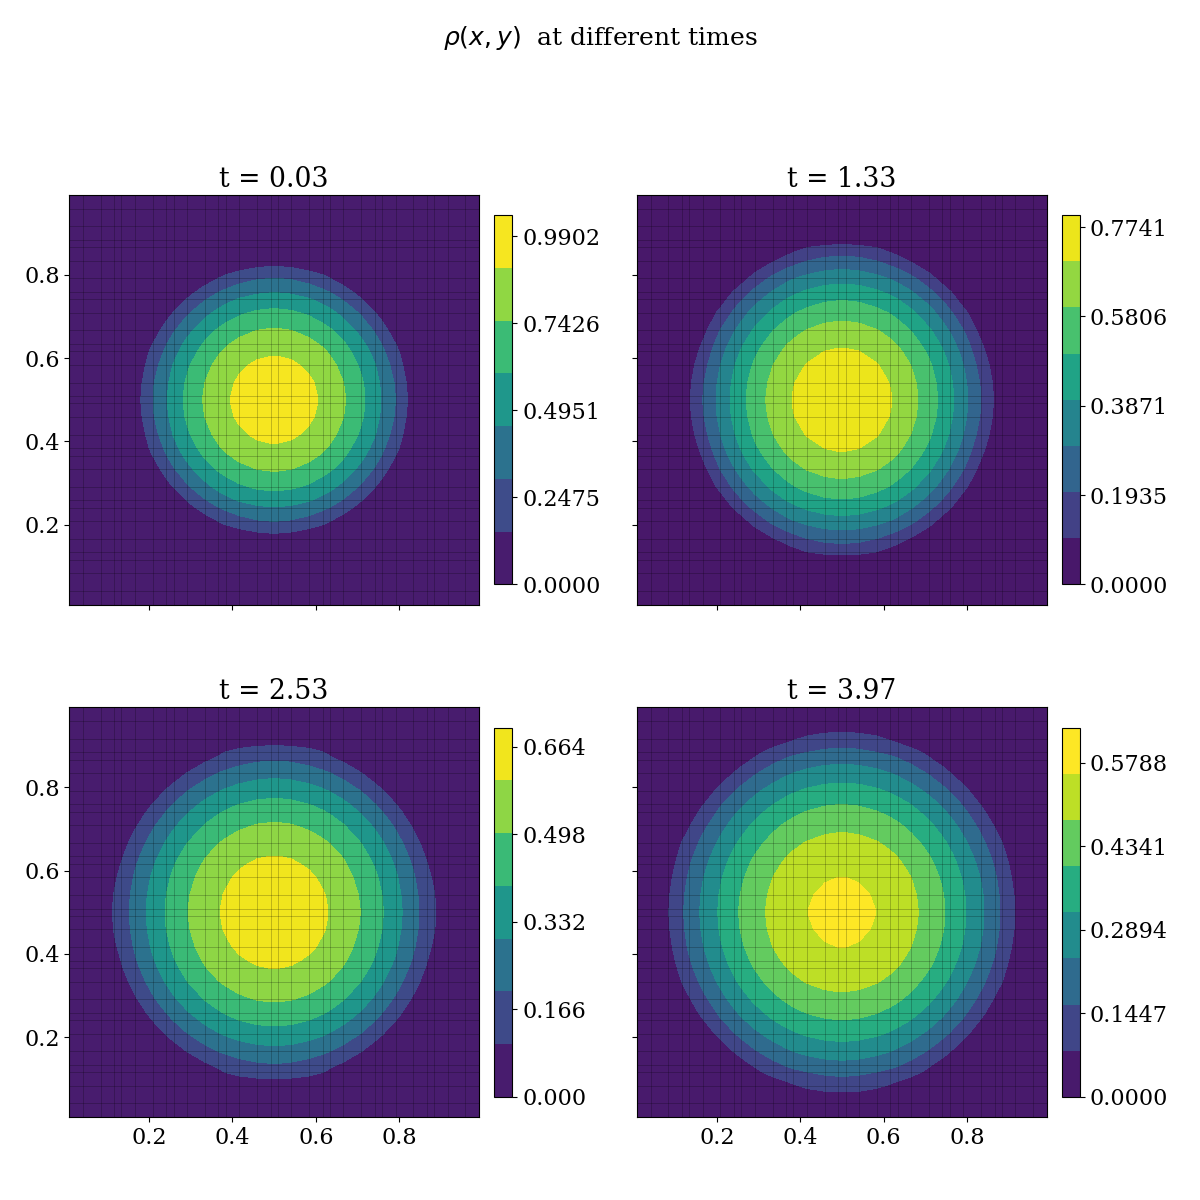

In [57]:
num_plots = 4
time_indices = np.linspace(0, len(pt) - 1, num=num_plots, dtype=int)
times = pt[time_indices]

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True)  # Square layout
fig.suptitle(r'$\rho(x,y)$  at different times', fontsize=18)

for idx, ax in enumerate(axes.flat):
    t = times[idx]
    
    # Evaluate the function at time t
    funvals = PP.evaluateQuadratureFun(t, xx, yy, PP.rhoh)

    for _ in xx[0, :]:
        ax.axvline(x=_, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
    for _ in yy[:, 0]:
        ax.axhline(y=_, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
    
    # Plot contour
    vmin = np.min(funvals)
    vmax = np.max(funvals)
    contour = ax.contourf(xx, yy, funvals, cmap='viridis', vmin=vmin, vmax=vmax)
    
    # Set square aspect ratio
    ax.set_aspect('equal')
    
    # Add title
    ax.set_title(f't = {t:.2f}')
    
   
    
    # Add a smaller, tighter colorbar
    cbar = fig.colorbar(contour, ax=ax, shrink=0.7, pad=0.03)
    cbar.set_ticks(np.linspace(vmin, vmax, num=5)) 

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig("2D_alpha_2_sol.pdf")
plt.show()


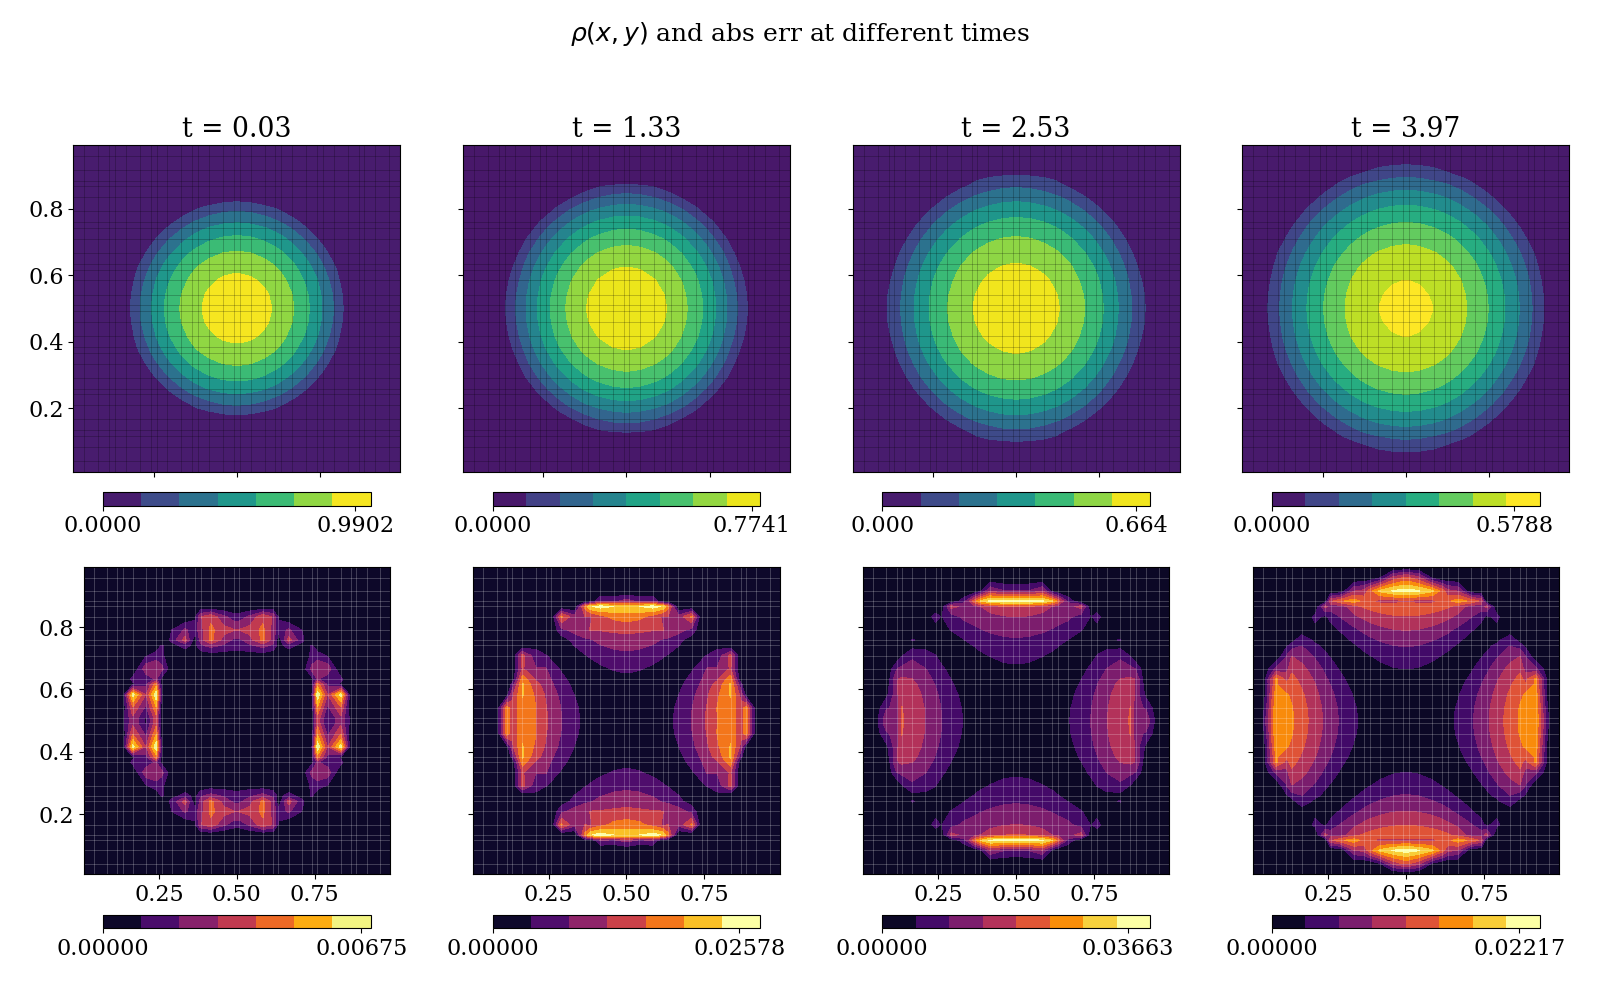

In [56]:
num_plots = 4
time_indices = np.linspace(0, len(pt) - 1, num=num_plots, dtype=int)
times = pt[time_indices]

# Create a 2x4 grid: top row = funvals, bottom row = difference
fig, axes = plt.subplots(2, 4, figsize=(16, 10), sharex=True, sharey=True)
fig.suptitle(r'$\rho(x,y)$ and abs err at different times', fontsize=18)

for idx, t in enumerate(times):
    row1_ax = axes[0, idx]  # Top row
    row2_ax = axes[1, idx]  # Bottom row

    # Compute both functions
    funvals = PP.evaluateQuadratureFun(t, xx, yy, PP.rhoh)
    funvals2 = PP.evaluateQuadratureFun(t, xx, yy, PP.rhohex)
    diffvals = abs(funvals2 - funvals)

    # Plot original function in top row
    for _ in xx[0, :]:
        row1_ax.axvline(x=_, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
    for _ in yy[:, 0]:
        row1_ax.axhline(y=_, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

    vmin = np.min(funvals)
    vmax = np.max(funvals)
    contour1 = row1_ax.contourf(xx, yy, funvals, cmap='viridis', vmin=vmin, vmax=vmax)
    row1_ax.set_aspect('equal')
    row1_ax.set_title(f't = {t:.2f}')
    cbar1 = fig.colorbar(contour1, ax=row1_ax, shrink=0.8, pad=0.05, orientation="horizontal")
    cbar1.set_ticks(np.linspace(vmin, vmax, num=2))

    # Plot difference in bottom row
    for _ in xx[0, :]:
        row2_ax.axvline(x=_, color='white', linestyle='-', linewidth=0.5, alpha=0.3)
    for _ in yy[:, 0]:
        row2_ax.axhline(y=_, color='white', linestyle='-', linewidth=0.5, alpha=0.3)

    vmin_diff = np.min(diffvals)
    vmax_diff = np.max(diffvals)
    contour2 = row2_ax.contourf(xx, yy, diffvals, cmap='inferno', vmin=vmin_diff, vmax=vmax_diff)
    row2_ax.set_aspect('equal')
    #row2_ax.set_title(r'$\rho_{\mathrm{ex}} - \rho$')

    cbar2 = fig.colorbar(contour2, ax=row2_ax, shrink=0.8, pad=0.1, orientation="horizontal")
    cbar2.set_ticks(np.linspace(vmin_diff, vmax_diff, num=2))

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig("2D_alpha_2_sol_err.pdf")
plt.show()

